In [1]:
import os
import torch
import numpy as np
from torch import nn
from d2l import torch as d2l
from torch.utils import data
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
from torchvision.datasets import ImageFolder

In [2]:
train_dir='/home/li/ML_object/cnn_flower_classification/input_data'
roses = []
label_roses = []
tulips = []
label_tulips = []
dandelion = []
label_dandelion = []
sunflowers = []
label_sunflowers = []

def getDatas(fileDir,train_percent):
    for file in os.listdir(os.path.join(fileDir,'roses')):
        roses.append(fileDir+'/roses/'+file)
        label_roses.append(int(0))
    for file in os.listdir(os.path.join(fileDir,'tulips')):
        tulips.append(fileDir+'/tulips/'+file)
        label_tulips.append(int(1))
    for file in os.listdir(os.path.join(fileDir,'dandelion')):
        dandelion.append(fileDir+'/dandelion/'+file)
        label_dandelion.append(int(2))
    for file in os.listdir(os.path.join(fileDir,'sunflowers')):
        sunflowers.append(fileDir+'/sunflowers/'+file)
        label_sunflowers.append(int(3))
    image_list=np.hstack((roses,tulips,dandelion,sunflowers))
    label_list=np.hstack((label_roses,label_tulips,label_dandelion,label_sunflowers))
    print(label_list[:100])
    temp=np.array([image_list,label_list])
    temp=temp.transpose()
    np.random.shuffle(temp)
    allImage=list(temp[:,0])
    allLabel=list(temp[:,1])
    allLabel = [ int(x) for x in allLabel ]
    #按比例分为训练集和测试集
    train_percent=train_percent
    length=len(allImage)
    splPoint=int(train_percent*length)
    train_img=allImage[0:splPoint]
    test_img=allImage[splPoint:length-1]
    train_label=allLabel[0:splPoint]
    test_label=allLabel[splPoint:length-1]
    return train_img,train_label,test_img,test_label

In [3]:
train_img,train_label,test_img,test_label=getDatas(train_dir,0.8)
print(train_img[:8],train_label[0:8])
print(len(train_img))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['/home/li/ML_object/cnn_flower_classification/input_data/sunflowers/2887samples3.jpg', '/home/li/ML_object/cnn_flower_classification/input_data/tulips/1083samples1.jpg', '/home/li/ML_object/cnn_flower_classification/input_data/tulips/1323samples1.jpg', '/home/li/ML_object/cnn_flower_classification/input_data/roses/362samples0.jpg', '/home/li/ML_object/cnn_flower_classification/input_data/roses/275samples0.jpg', '/home/li/ML_object/cnn_flower_classification/input_data/dandelion/1751samples2.jpg', '/home/li/ML_object/cnn_flower_classification/input_data/tulips/911samples1.jpg', '/home/li/ML_object/cnn_flower_classification/input_data/tulips/707samples1.jpg'] [3, 1, 1, 0, 0, 2, 1, 1]
2429


In [4]:
transform  = transforms.Compose([
         transforms.ToTensor(),
])
def default_loader(path):
    img_pil =  Image.open(path)
    img_tensor=transform(img_pil)
    return img_tensor
img_=default_loader(train_img[0])

In [5]:
class train_set(Dataset):
    def __init__(self):
        self.imgs=train_img
        self.label=train_label
    def __getitem__(self,index):
        fn=self.imgs[index]
        image=Image.open(fn)
        image_tensor=transform(image)
        label=self.label[index]
        return image_tensor,label
    def __len__(self):
        return len(self.imgs)

class test_set(Dataset):
    def __init__(self):
        self.imgs=test_img
        self.label=torch.tensor(test_label)
    def __getitem__(self,index):
        fn=self.imgs[index]
        image=Image.open(fn)
        image_tensor=transform(image)
        label=self.label[index]
        return image_tensor,label
    def __len__(self):
        return len(self.imgs)

In [6]:
train_data=train_set()
train_iter=data.DataLoader(train_data, 64, shuffle=True,
                            num_workers=4)
test_data=test_set()
test_iter=data.DataLoader(train_data, 64, shuffle=True,
                            num_workers=4)

In [7]:
for (X,y) in train_data:
    print(X)
    break

tensor([[[0.1765, 0.5725, 0.7490,  ..., 0.5647, 0.4824, 0.8157],
         [0.5176, 0.4314, 0.5686,  ..., 0.4471, 0.6196, 0.4078],
         [0.5922, 0.4471, 0.3059,  ..., 0.5608, 0.4510, 0.2745],
         ...,
         [0.6196, 0.5804, 0.7922,  ..., 0.3647, 0.4196, 0.5843],
         [0.6392, 0.4667, 0.6941,  ..., 0.3255, 0.3059, 0.3725],
         [0.5451, 0.4745, 0.6510,  ..., 0.3686, 0.4196, 0.3882]],

        [[0.2000, 0.5961, 0.7686,  ..., 0.6196, 0.5137, 0.8275],
         [0.5647, 0.4745, 0.6000,  ..., 0.5098, 0.6627, 0.4235],
         [0.6627, 0.5098, 0.3569,  ..., 0.6353, 0.4941, 0.2941],
         ...,
         [0.5725, 0.5333, 0.7490,  ..., 0.3725, 0.4196, 0.5843],
         [0.5647, 0.4039, 0.6353,  ..., 0.3255, 0.2980, 0.3569],
         [0.4667, 0.4000, 0.5882,  ..., 0.3725, 0.4039, 0.3647]],

        [[0.1843, 0.5961, 0.7922,  ..., 0.7333, 0.6588, 0.9961],
         [0.4706, 0.4196, 0.6078,  ..., 0.5686, 0.7490, 0.5373],
         [0.5059, 0.4039, 0.3216,  ..., 0.6196, 0.5020, 0.

In [8]:
net = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=5, stride=1, padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=4, stride=2),
    nn.Conv2d(32, 64, kernel_size=3, stride=2,padding=2), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1), nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(),
    nn.Conv2d(64, 64, kernel_size=3, padding=1), nn.ReLU(),
    nn.Flatten(),
    # 这里，全连接层的输出数量是LeNet中的好几倍。使用dropout层来减轻过度拟合
    nn.Linear(1024, 1024), nn.ReLU(),
    nn.Dropout(p=0.2),
    nn.Linear(1024, 512), nn.ReLU(),
    nn.Dropout(p=0.1),
    nn.Linear(512, 4))

In [40]:
def vgg_block(num_convs,in_channels,out_channels):
    layers=[]
    for ncv in range(num_convs):
        layers.append(nn.Conv2d(in_channels,out_channels,kernel_size=3,padding=1))
        layers.append(nn.ReLU())
        in_channels=out_channels
    layers.append(nn.MaxPool2d(kernel_size=2,stride=2))
    return nn.Sequential(*layers)

In [41]:
def vgg(conv_arch):
    conv_blks=[]
    in_channels=3
    for (num_convs,out_channels) in conv_arch:
        conv_blks.append(vgg_block(num_convs,in_channels,out_channels))
        in_channels=out_channels
    return nn.Sequential(*conv_blks,nn.Flatten(),
                        nn.Linear(out_channels*8*8,4096),nn.ReLU(),nn.Dropout(0.2),
                        nn.Linear(4096,4096),nn.ReLU(),nn.Dropout(0.2),
                        nn.Linear(4096,4))

In [42]:
conv_arch = ((3, 16), (4, 32), (3, 16))
net_vgg=vgg(conv_arch)

loss 1.375, train acc 0.296, test acc 0.296
1166.7 examples/sec on cuda:0


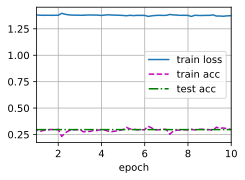

In [43]:
lr, num_epochs = 0.03, 10
d2l.train_ch6(net_vgg, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())

loss 0.021, train acc 0.997, test acc 0.999
4540.6 examples/sec on cuda:0


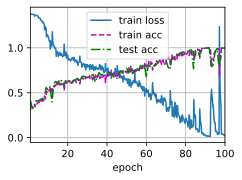

In [9]:
lr, num_epochs = 0.02, 100
d2l.train_ch6(net, train_iter, test_iter, num_epochs, lr, d2l.try_gpu())